In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pathlib
import re

In [ ]:
def read_train_test_loss_acc(root_dir):
    train_logs = list(pathlib.Path(root_dir).glob('train_log_epoch*.txt'))
    valid_logs = list(pathlib.Path(root_dir).glob('valid_log_epoch*.txt'))
    train_logs = sorted(train_logs, key=lambda i: int(re.split(r'(\d+)', str(i))[1]))
    valid_logs = sorted(valid_logs, key=lambda i: int(re.split(r'(\d+)', str(i))[1]))
    train_loss, test_loss, train_acc, test_acc, train_epochs, test_epochs = [],[],[],[],[],[]
    for log in train_logs:
        with open(log, 'r') as f:
            reader = csv.reader(f, delimiter = '\t')
            d = list(reader)
            train_loss.append(float(d[0][2]))
            train_acc.append(float(d[0][1]))
            train_epochs.append(int(d[0][0]))
            
    for log in valid_logs:
        with open(log, 'r') as f:
            reader = csv.reader(f, delimiter = '\t')
            d = list(reader)
            test_loss.append(float(d[0][2]))
            test_acc.append(float(d[0][1]))
            test_epochs.append(int(d[0][0]))
    
    return train_loss, test_loss, train_acc, test_acc, train_epochs, test_epochs

### Pretrained ResNet - Freeze FC only

Last test acc: 0.895 max: 0.899


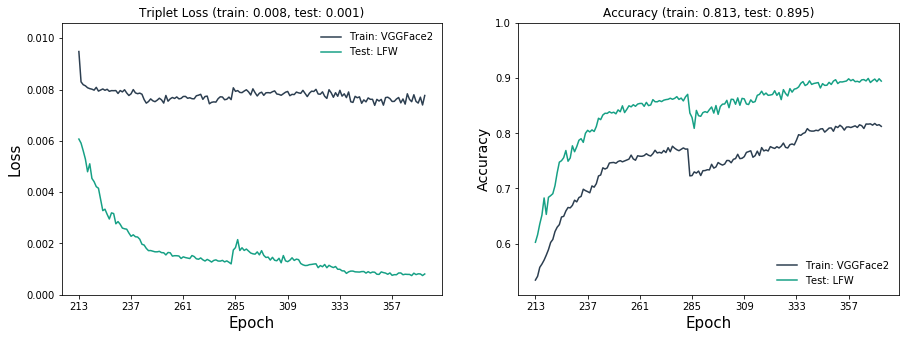

In [49]:
train_loss, test_loss, train_acc, test_acc, train_epochs, test_epochs = read_train_test_loss_acc('log')
f = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(f'Triplet Loss (train: {round(train_loss[-1], 3)}, test: {round(test_loss[-1], 3)})')
plt.plot(train_epochs[213:], train_loss[213:], color = '#2c3e50', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim(0, max(train_loss)+0.1*max(train_loss))
plt.plot(test_epochs[213:], test_loss[213:], color = '#16a085', label = 'Test: LFW')
plt.legend(frameon=False)
plt.xticks(np.arange(min(train_epochs[213:]), max(train_epochs[213:])+1, len(train_epochs)//15))

plt.subplot(1,2,2)
plt.title(f'Accuracy (train: {round(train_acc[-1], 3)}, test: {round(test_acc[-1], 3)})')
plt.plot(train_epochs[213:], train_acc[213:], color = '#2c3e50', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 14)
plt.ylim(min(train_acc)-.05*min(train_acc), 1)
plt.plot(test_epochs[213:], test_acc[213:], color = '#16a085', label = 'Test: LFW')
plt.legend(frameon=False, loc='lower right')
plt.xticks(np.arange(min(train_epochs[213:]), max(train_epochs[213:])+1, len(train_epochs)//15))
plt.savefig('log/a-graph-loss-accuracy.jpg', dpi=f.dpi)
print('Last test acc:', round(test_acc[-1], 3), 'max:', round(max(test_acc), 3))

Max test acc: 0.835


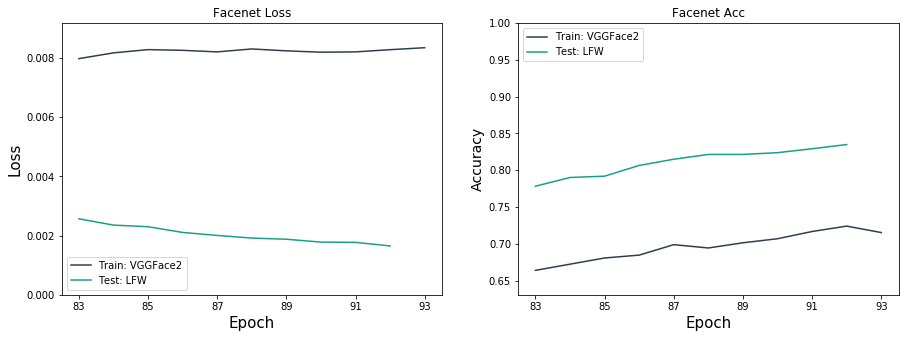

In [58]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
train_loss, test_loss, train_acc, test_acc, train_epochs, test_epochs = read_train_test_loss_acc('log')

f = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Facenet Loss')
plt.plot(train_epochs, train_loss, color = '#2c3e50', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim(0, max(train_loss)+0.1*max(train_loss))
plt.plot(test_epochs, test_loss, color = '#16a085', label = 'Test: LFW')
plt.legend(loc='lower left')
plt.xticks(np.arange(min(train_epochs), max(train_epochs)+1, 2.0))

plt.subplot(1,2,2)
plt.title('Facenet Acc')
plt.plot(train_epochs, train_acc, color = '#2c3e50', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 14)
plt.ylim(min(train_acc)-.05*min(train_acc), 1)
plt.plot(test_epochs, test_acc, color = '#16a085', label = 'Test: LFW')
plt.legend(loc='upper left')
plt.xticks(np.arange(min(train_epochs), max(train_epochs)+1, 2.0))
plt.savefig('log/a-graph-loss-fc-only-accuracy.jpg', dpi=f.dpi)
print('Max test acc:', round(max(test_acc), 3))